Feb 26, 2024

# Intro to numerical errors

## Outline:
- Different types of errors
- How computers store decimal numbers (floating point representation)
- Error propagation
- Rounding errors


## 1. Types of Errors

Throughout the literature, lecture and exercises you will occasionally see *accuracy* and *precision*. We try to be consistent in their definitions:
- *accuracy* describes how close a measured/calculated value is to the (often unknown) true value
- *precision* denotes the number of digits used in a mathematical operation

Question: Which measurement of the speed of light in vacuum is more precise?
a) 3 x 10$^5$ km/s
b) 2.124 x $10^5$ km/s


For a history of how the speed of light was first measured, check out: https://pubs.aip.org/physicstoday/article/57/12/16/412650/Romer-and-the-Finite-Speed-of-Light


correct answer:.. b)..

But a) is the most accurate!

There are different sources of errors, such as **'human error'** and the typical **measurement errors**. 

In numerical computing there are additionally two other types of errors:
- Approximation Errors
- Roundoff Errors

### Approximation Errors
We often use approximate functions that allow us to code a problem, either to speed up calculation or because a direct calculation of certain functions is not possible. Such approximations naturally lead to a loss of accuracy. We can use the example of using the Taylor series to approximate the exponential $e^x$:
$$ y=e^x\approx\sum_{n=0}^{n_{\rm max}}{{x^n}\over{n!}}$$

In [2]:
from scipy.special import factorial
import numpy as np

def etaylor(x,nmax=50):
    e = 0
    for i in range(nmax):
        e += x**i/factorial(i)
    return e

for i in range(1,40,5):
    print("n = {}, Taylor = {:6.6f}, Exact = {:6.6f}, Difference = {}".format(i,etaylor(10,nmax=i), np.exp(10), abs(etaylor(10,nmax=i)-np.exp(10))))

n = 1, Taylor = 1.000000, Exact = 22026.465795, Difference = 22025.465794806718
n = 6, Taylor = 1477.666667, Exact = 22026.465795, Difference = 20548.79912814005
n = 11, Taylor = 12842.305115, Exact = 22026.465795, Difference = 9184.16068016827
n = 16, Taylor = 20952.886969, Exact = 22026.465795, Difference = 1073.5788262001734
n = 21, Taylor = 21991.482026, Exact = 22026.465795, Difference = 34.98376914165419
n = 26, Taylor = 22026.076361, Exact = 22026.465795, Difference = 0.38943391565044294
n = 31, Taylor = 22026.464036, Exact = 22026.465795, Difference = 0.0017585478017281275
n = 36, Taylor = 22026.465791, Exact = 22026.465795, Difference = 3.6711608117911965e-06


### Roundoff errors
Since floating point approximations (see below) are not infinitively precise, some information is lost. By performing subsequent calculations, that means we can get imprecise results. This is illustrated in this example.

We expect $(\sqrt{2})^2 - 2 = 0$.

In [3]:
(np.sqrt(2))**2 - 2

4.440892098500626e-16

Since the square-root cannot be calculated with infinitively many digits, a roundoff error occurs that subsequently increases during the squaring and finally in the subtraction.

## Numerical Errors can have big consequences!

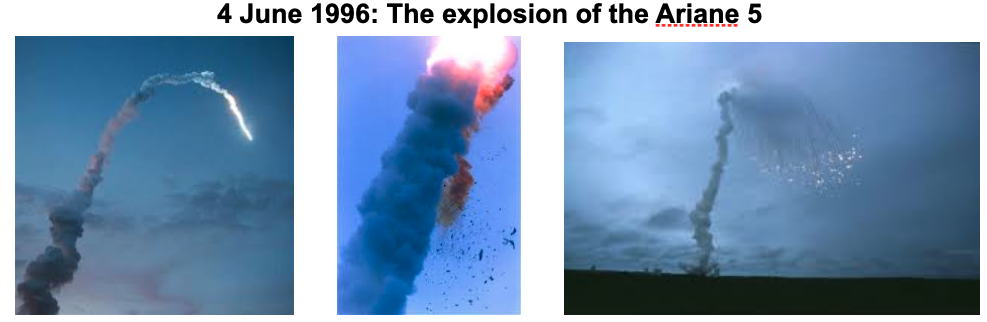

- Loss of guidance 37 seconds after launch due to errors in the software controlling the inertial reference system
- Data conversion from a 64-bit floating point to a 16-bit integer value
    - The floating point number had a value greater than what could be represented by a 16-bit signed integer

## 2. Floating point representation of decimal numbers
Computers store their information using a finite number of binary digits, or*bits*. 

Let's take the number 22 in the decimal system: $22_{10}$. Using 5 bits in the binary system this number is:

$$10110_2 = 1\cdot16 + 0\cdot8 + 1\cdot4 + 1\cdot2 +0\cdot1= 22_{10}$$

In general, a binary number $edcba$ (where the letters can have the values of $0$ or $1$) corresponds to $$e\cdot2^4+d\cdot2^3+c\cdot2^2+b\cdot2^1+a\cdot2^0$$ in the decimal system.


Fractional numbers work similary. The number $0.abcde$ corresponds to: $$a\cdot2^{-1}+b\cdot2^{-2}+c\cdot2^{-3}+d\cdot2^{-4}+e\cdot2^{-5}$$

Thus e.g. $$0.00101_2 = 1\cdot2^{-3} + 1\cdot^{-5} = 1/8 + 1/32 = 0.15625_{10}$$ 

Since each bit corresponds to multiplication of a 0 or a 1 with a different power of 2, and we only have a finite number of bits to represent a number, this means that it is not possible to store all possible real numbers. 
(Note however, that Python has unlimited/arbitrary precision integers; the implementation of this is  beyond this lecture; so can find information e.g. at https://en.wikipedia.org/wiki/Arbitrary-precision_arithmetic)

#### An example that doesn't convert exactly:

0.3

With 5 bits for the fractional part, the binary representation is: 0.01001$_2$.
With 9 bits: 0.010011001$_2$. With even more bits the pattern 1001 repeats endlessly.

In [1]:
0*2**(-1) + 1*2**(-2) + 0 * 2**(-3) + 0*2**(-4) + 1*2**(-5)

0.28125

In [2]:
0*2**(-1) + 1*2**(-2) + 0 * 2**(-3) + 0*2**(-4) + 1*2**(-5) + 1*2**(-6) + 0 * 2**(-7) + 0 * 2**(-8)+1*2**(-9)

0.298828125

To represent real numbers, the most-used convetion is the floating point representation.

This takes the form of $$x_{\rm floating~point}=(-1)^s\times1.f\times2^{e-{\rm bias}}$$<br>where:
- $s$ is the sign bit (0 for positive, 1 for negative)
- $f$ is the fraction of the mantissa (notice it starts with the hidden bit 1)
- $e$ is the exponent that is always positive but using a *bias* we allow for negative values (numbers smaller than 1) as well.


For single precision (32 bits)
- sign: 1 bit
- exponent: 8 bits
- mantissa: 24 bits (23 explicity stored)

Double precision (64 bits): 
- sign: 1 bit
- exponent: 11 bits
- mantissa: 53 bits (52 bits explicitly stored)


We saw that the number $0.15625_{10}$ is $0.00101_2$ in binary, or equivalently:
$$1.01_2\times2^{-3}$$
Where we have 'floated' the dot 3 positions to the right in order to have the first significant digit (the first 1) be to the left of the dot. This convention of having 1 always be on the left of the dot allows us to store a digit implicitly.

From which we can read off the mantissa ($f$): 01000000000000000000000, where we have used 23 bits (single precision).

To get the exponent in the floating point representation, we need to add the bias.

In *single precision* the bias (to allow for negative exponents) is $127$ so $e=124$. 

The binary value of the exponent in single precision (*8 bits*) is:

$$124_{10} = 0\times2^{1} + 1\times2^{2} + 1\times2^{3} + 1\times2^{4} + 1\times2^{5} +1\times2^{6} + 0\times2^{7} + 0\times2^{8} = 01111100_2$$ <br><br>


So the floating point (single precision) representation of $0.15625_{10}$ is:
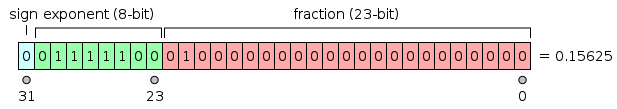
<hr>

The figure below is a representation of how real numbers are represented in the standard (IEEE-754) floating point system.<br>


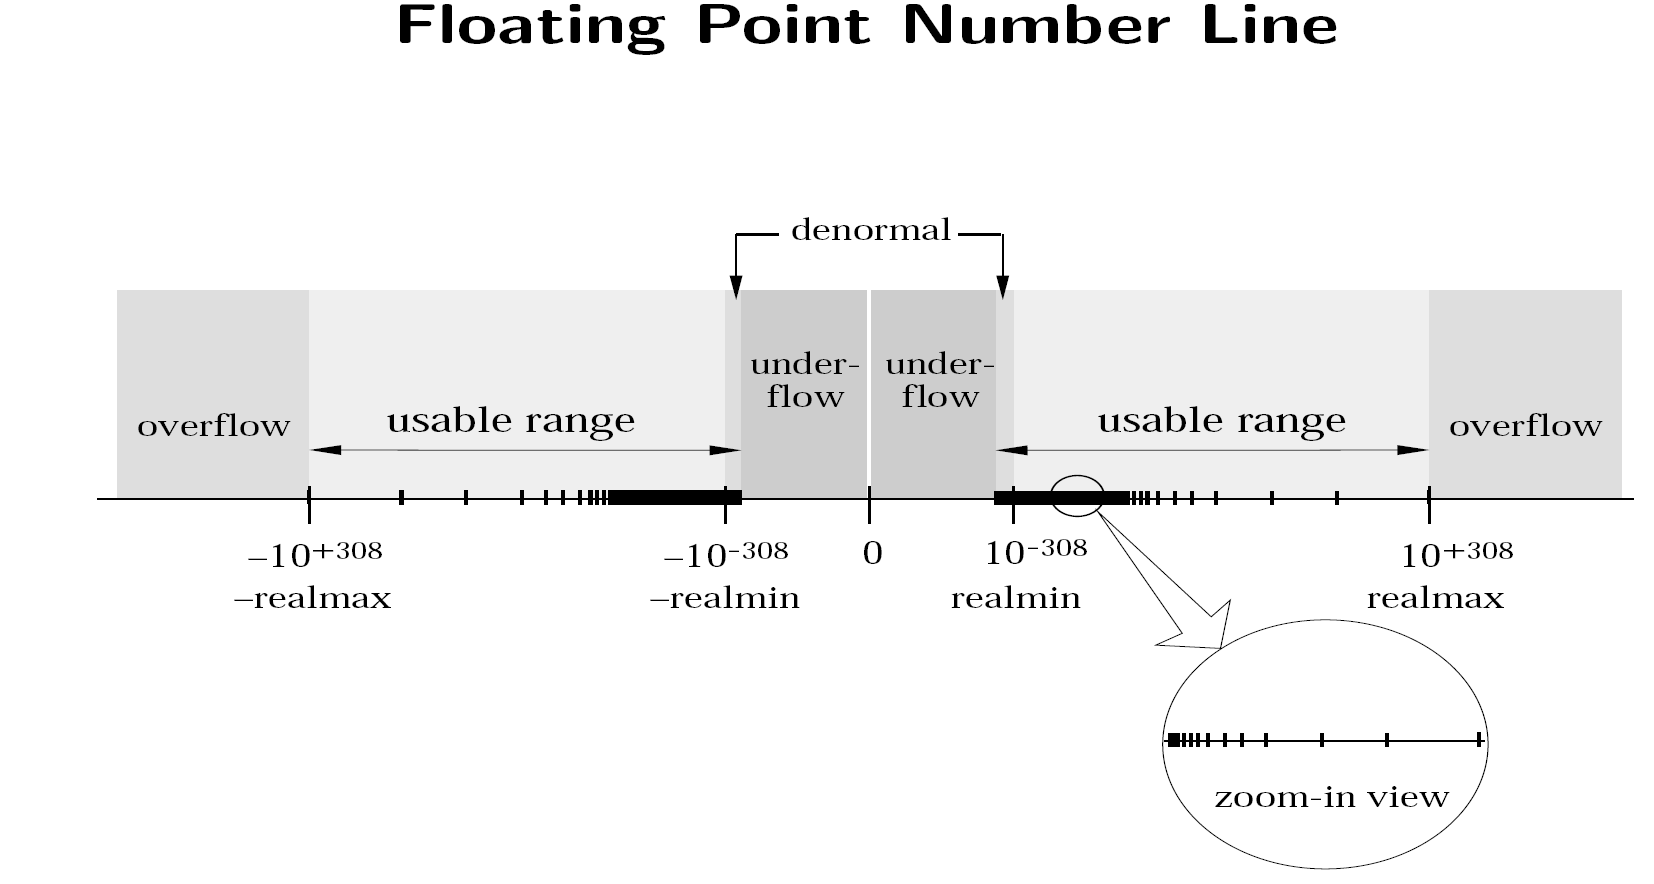

Figure from: https://courses.physics.illinois.edu/cs357/sp2020/notes/ref-4-fp.html

A further excellent summary can also be found here: http://steve.hollasch.net/cgindex/coding/ieeefloat.html

The limits (in decimal numbers) for a double precision float (64 bits) are: 
$$ \pm 2^{-1074} \longleftrightarrow 2^{1023}$$ corresponding to base-10 scientific notation:
$$\pm 4.9\times10^{-324}\longleftrightarrow\pm1.8\times10^{308}$$

As an example we look at how the limits to the exponent is derived.
- In double precision, 11 bits are available to store the exponent
- Values (in binary) thus range from `0000 0000 000` to `1111 1111 111`
- This corresponds (in decimal numbers to) $0<e<2047$
- applying the *bias* and recognising that $0$ and $2047$ represent special cases (denormalised, $0$, $\infty$, and *NaN*), means that $-1023<e-{\rm bias}<1024$ 

### Overflow
Overflow occurs when one tries to represent a number that is larger (in absolute values) than the limit available (so for doubles, $\pm1.8\times10^{308}$). 

In [3]:
large = 2.**1021 # as we saw above, in base-2, the maximum exponent is 1024, so we start close to that
for i in range(3):
    large *= 2
    print(i, large)

0 4.49423283715579e+307
1 8.98846567431158e+307
2 inf


### Machine precision
Although we can reach the smallest number of $4.9\times 10^{-324}$ this of course does not mean that our *doubles* can have 324 significant figures. The machine precision is given by the number of significant figures that can be stored, and this is related to the number of significant figures in the *mantissa*. As you have seen, a double-precision floating point number uses 52 bits to store the mantissa. Hence 51 *zeros* and a final *one* corresponds to a machine precision of $1/2^{52}\approx 2.2\times10^{-16}$. 

In [10]:
small = 2**(-52)
print('Machine precision: ',small)

print('1+small = ', 1+small)

print('---')
print('If I try a smaller number: ')
print(small/2)
print('1+small = ', 1+small/2)

Machine precision:  2.220446049250313e-16
1+small =  1.0000000000000002
---
If I try a smaller number: 
1.1102230246251565e-16
1+small =  1.0


In [11]:
small = 2**(-52)*2**(-1022)
print ('A number we can represent is:', small)

small = 0.7*2**(-52)*2**(-1022)
print ('This is stored as the same number as the previous one: ',small)

small = 0.2*2**(-52)*2**(-1022)
print ('This rounds down to just zero: ',small)

A number we can represent is: 5e-324
This is stored as the same number as the previous one:  5e-324
This rounds down to just zero:  0.0


### Important notes
As you have seen here, the fact that you can represent a small number, all the way down to $4.9\times 10^{-324}$, does not mean that you can use a number of e.g. $1+10^{-300}$! <br> So how can you still deal with such small numbers and how can you avoid problems with the machine precision when doing operations with such numbers? 


#### possible option

- Find a common constant that you can subtract, multiply or divide out
- This allows you to work with numbers that otherwise would not be possible
- In physics, one often factors out constants such as the speed of light and the Boltzmann and Planck constants

## 3. Error propagation

Errors propagate in different ways depending on the mathematical operations that are carried out. Throughout the course we will work with *absolute* and *relative* errors. Absolute errors are defined as $$\Delta x=|{\tilde x}-x|$$<br>
Here $x$ is the (unknown) true value and ${\tilde x}$ the approximate value.<br>
Similarly, the relative error is defined as: $$\delta x={{\Delta x}\over{x}}={{|{\tilde x}-x|}\over{x}}.$$<br>
Since we generally do not know $x$, but (hopefully) ${\tilde x}\approx x$, these functions are often used with ${\tilde x}$ in the denominator.<br>
As you can imagine, the we most often aim to limit the relative error, since when working in physics, one often deals with quantities of many different orders of magnitude. 

The question now is how mathematical operations affect the errors of the eventual result (mostly independent of the origin of the errors). Following the book we first look at the simple case of addition and subtraction.

### Addition and subtraction
We start with the subtraction of two numbers $a$ and $b$ ($x=a-b$). Since we don't know the numbers exactly, what we instead calculate is:
$${\tilde x} = {\tilde a} - {\tilde b},$$
where $${\tilde a}=a+\Delta a,~{\rm and}~{\tilde b}=b+\Delta b.$$<br>
We thus find $$\Delta x=|{\tilde x}-x|=|(a+\Delta a)-(b+\Delta b) - (a-b)|=|\Delta a - \Delta b|.$$

Using the triangle inequality we find $$|\Delta x|\leq|\Delta a|+|\Delta b|$$<br>
This provides an upper bound to the error in the result. 

#### Catastrophic cancellation
Now what happens when $a\approx b$. The relative error for the subtraction can be written as:
$$|\delta x|\leq(|\delta a|+|\delta b|){{|a|}\over{|a-b|}}$$

In [9]:
# So for example
ap, bp=1.25, 1.20
Da, Db=0.03, 0.03
print(Da/ap, Db/bp)

0.024 0.025


In [10]:
print((Da/ap+Db/bp)*ap/(ap-bp))

1.224999999999999


So a relative error **>100%**.

### Arbitrary functions
If we now instead want to calculate the error for $y=f(x)$ we calculate:
$$\Delta y=|{\tilde y}-y|=|f({\tilde x})-f(x)|.$$<br>
We can use a Taylor expansion for $f({\tilde x})$ around $x$.
$$\Delta y=f(x+\Delta x)-f(x)$$
$$= f(x) + {{df(x)}\over{dx}}({\tilde x}-x) + {{1}\over{2}}{{d^2f(x)}\over{dx^2}}({\tilde x}-x)^2 + \ldots - f(x)$$
$$\approx {{df(x)}\over{dx}}({\tilde x}-x).$$<br>
This is valid for ${\tilde x}\approx x$ for continuous smooth functions and shows how the derivative of the function determines how the error in the variable is affected by the operation.

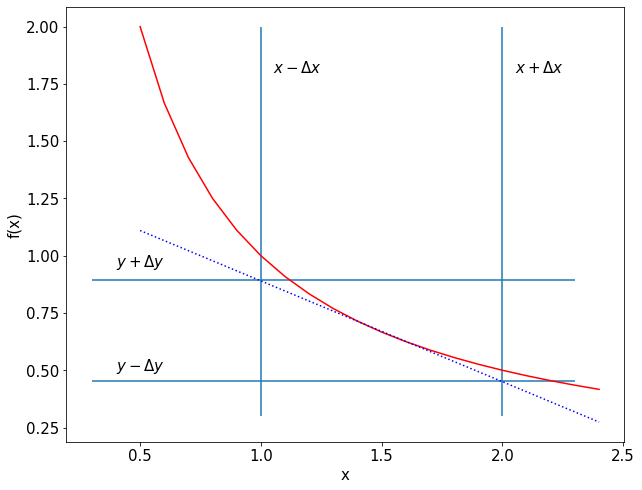

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update({'font.size': 15})  # This sets the fontsize and labelsize for the entire notebook
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 


def func(x):
    return 1/x

xs = [0.5+0.1*i for i in range (20)]
ys = [func(x) for x in xs]
zs = [(1.33-0.44*x) for x in xs]

plt.figure(figsize=(10,8))
plt.plot(xs, ys, 'r-')
plt.plot(xs, zs, 'b:')
plt.vlines(1.0,0.3,2.)
plt.vlines(2.0,0.3,2.)
plt.hlines(0.8933,0.3,2.3)
plt.hlines(0.4533,0.3,2.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.annotate('$x-\Delta x$', xy=(1.05, 1.8))
plt.annotate('$x+\Delta x$', xy=(2.05, 1.8))
plt.annotate('$y+\Delta y$', xy=(0.4, 0.95))
plt.annotate('$y-\Delta y$', xy=(0.4, 0.5))
plt.show()

This can be generalised for function of many variables using:
$$\Delta y\approx\sum^{n-1}_{i=0}{{\partial f}\over{\partial x_1}}\Delta x_i$$

Here ${{\partial f}\over{\partial x_i}}$ is the partial derivative of the function $f$ wrt $x_i$. The error in $f$ is $\sigma_f$ and those in the individual parameters is $\sigma x_i.$

## .. Pause for a Mentimeter quiz...

![image](mentimeter_qr_code.png)

## 4. Rounding errors
Because errors can build up we want to make sure that we perform as few operations as possible in our numerical implementation, or modify the operations so that the errors don't blow up. <br>


#### Order of operations matters because of rounding error 

In [62]:
print ((0.7 + 0.1) + 0.3 )
print (0.7 + (0.1 + 0.3))

1.0999999999999999
1.1



### Let's naively evaluate this expression:
$$ f(x) = {{1}\over{\sqrt{x^2+1}-x}}.$$


In [26]:
from math import sqrt

def naiveval(x):
    return 1/(sqrt(x**2 + 1)-x)

xs = [10**i for i in range(4,8)]

ys = [naiveval(x) for x in xs]
for x,y in zip(xs,ys):
    print(x,y)

10000 19999.99977764674
100000 200000.22333140278
1000000 1999984.77112922
10000000 19884107.85185185


In [38]:
x = 10**7
print(sqrt(x**2 + 1) )

print('Relative error on sqrt(x^2 +1)', (x - sqrt(x**2 + 1))/x )

print('Precision on x is machine precision', np.finfo(float).eps)
print('Relative error on x:', np.finfo(float).eps/x )

print('Relative error on sqrt(x^2 +1) - x', (sqrt(x**2 + 1) - x))

10000000.00000005
Relative error on sqrt(x^2 +1) -5.029141902923584e-15
Precision on x is machine precision 2.220446049250313e-16
Relative error on x: 2.220446049250313e-23


In [25]:
# for 10^8:
naiveval(10**8)

ZeroDivisionError: float division by zero

Because for large numbers $\sqrt{x^2+1}\approx x$ we get an error for dividing by `0`. <br>


The spacing between numbers of exponent e in base 2, with 53 bits for the mantissa is $2^{e-(p-1)}$. For our example:
$10^{16} \approx 2^{52} \cdot 2.188$

So the spacing between this number and the next is $\approx 2^{52- 52}$ , i.e. 1. 

So we cannot store the extra unity that is added in the above result (it is stored as the same number as $10^{16}$ due to our chosen machine precision. 

#### But with just some simple manipulations we can bring this expression to a numerically well-behaved one:
$$ f(x) = {{1}\over{\sqrt{x^2+1}-x}} = {{\sqrt{x^2+1}+x}\over{(\sqrt{x^2+1}+x)(\sqrt{x^2+1}-x)}} =$$
$$ = {{\sqrt{x^2+1}+x}\over{x^2+1-x^2}} = \sqrt{x^2+1}+x.$$

In [27]:
def bettereval(x):
    return (sqrt(x**2 + 1) + x)

xs = [10**i for i in range(4,10)]
zs = [bettereval(x) for x in xs]
for x,y,z in zip(xs,ys,zs):
    print(x,y,z)


10000 19999.99977764674 20000.000050000002
100000 200000.22333140278 200000.00000499998
1000000 1999984.77112922 2000000.0000005001
10000000 19884107.85185185 20000000.000000052


### Rounding errors can lead to completely wrong results...


Let's take the expression:
$$f(x) =  {{e^x -1}\over{x}} \approx 1 + {{x}\over{2!}}{{x^2}\over{3!}}  ...$$

where we have used the Taylor expansion: $$ y=e^x\approx\sum_{n=0}^{n_{\rm max}}{{x^n}\over{n!}}$$

We see that for x $\rightarrow 0$, $f(x) \rightarrow 1$.

Below is a naive implementation of the above expression.

In [55]:
from math import exp, log

def f(x):
    return (exp(x) - 1)/x

xs = [10**(-i) for i in (14, 15, 16)]
#xs+= [-10**(-i) for i in (15,16,17)]

fvals = [f(x) for x in xs]

print("\n x, f(x):")
for x, fval in zip(xs,fvals):
    print( x, fval)



 x, f(x):
1e-14 0.9992007221626409
1e-15 1.1102230246251565
1e-16 0.0


Rounding error kicks in and we get a wrong result

### A simple way to cancel the rounding errors in this case:

If instead we change the expression a bit we can get the rounding errors to cancel:

In [57]:
def g(x):
    w = exp(x)
    if w == 0.:
        val = -1./x
    elif w == 1.:
        val = 1.
    else:
        val = (exp(x) - 1)/log(exp(x))
    return val

gvals = [g(x) for x in xs]

print("\n x, f(x), g(x):")
for x, fval, gval in zip(xs,fvals, gvals):
    print( x, fval, gval)


 x, f(x), g(x):
1e-14 0.9992007221626409 1.000000000000005
1e-15 1.1102230246251565 1.0000000000000004
1e-16 0.0 1.0


In [61]:
# The function f divides these two numbers:
print(exp(9e-16) - 1, 9e-16)

8.881784197001252e-16 9e-16


In [60]:
# While the function g divides these two:
print(exp(9e-16)-1, log(exp(9e-16)) )

8.881784197001252e-16 8.881784197001248e-16


### Recursion

Consider the recursive relation:
$$f(n) = nf(n-1) - e^{-1}$$

In [21]:
from math import exp

def forward(nmax=22):
    oldint = 1-exp(-1)
    for n in range(1,nmax):
        print(n-1, oldint)
        newint = n*oldint - exp(-1)
        oldint = newint
        
print("n = 20 answer is 0.0183504676972562")
print("n, f[n]")
forward()

n = 20 answer is 0.0183504676972562
n, f[n]
0 0.6321205588285577
1 0.26424111765711533
2 0.16060279414278833
3 0.11392894125692266
4 0.08783632385624829
5 0.07130217810979911
6 0.059933627487352314
7 0.05165595124002387
8 0.045368168748748605
9 0.04043407756729511
10 0.03646133450150879
11 0.033195238345154365
12 0.03046341897041005
13 0.028145005443888316
14 0.026150635042994086
15 0.024380084473468955
16 0.022201910404060943
17 0.009553035697593693
18 -0.19592479861475587
19 -4.090450614851804
20 -82.17689173820752


A small initial error is mutliplied, leading to a completely wrong answer. The first number, a double precision floating point, has an absolute error of the order of $10^{-16}$. So for $n=20$ we have multiplied this by $n!=20!$!

The above equation also implies that
$$f(n-1) = {{f(n) + e^{-1}}\over{n}}, $$ which we can use in a backward recursion.

In [22]:
from math import exp

def backward(guess,nmax=31):
    oldint = guess
    for n in reversed(range(20,nmax)):
        print(n, oldint)
        newint = (oldint + exp(-1))/n
        oldint = newint
        
print("n = 20 answer is 0.0183504676972562")
print("n, f[n]")
backward(0.19)

n = 20 answer is 0.0183504676972562
n, f[n]
30 0.19
29 0.018595981372381408
28 0.013326738708407714
27 0.01361450642428036
26 0.014129405466508248
25 0.014692647947613484
24 0.015302883564762233
23 0.015965930197341858
22 0.01668892918994714
21 0.017480380470972248
20 0.018350467697257837


Although we do need an educated guess, the error on the first value was still almost 0.01. But since the error decreased, by the time we're at $n=20$ the remaining error is very small. Even if we pick 1.0 as a starting value, the result is close.

## Conclusions

### Whenever you implement a function, be aware of the pitfalls of rounding errors and investigate if there are better possible implementations. Do not blindly trust that your code returns the correct value!